<a href="https://colab.research.google.com/github/AG-Samaniego/AG-Samaniego.github.io/blob/main/Text_As_Data_copyIS312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working in Google Colab

This is more than a flat text document: it's a program that you can run in in the browser through Google Colab, which allows you to embed executable code into your writing. By default, most Colab notebooks are written in Python, but other options are possible: this notebook, for example, is written in R. If you click the 'run' arrow in the code boxes below, the code will run and the results will print below the code block. Try that with the simple math code below.

In [ ]:
2+2
5*32
10^10

[1] 4

[1] 160

[1] 1e+10

# Headline

Now I can add **some text** to this document. If you know Markdown, you can _use markdown conventions_ as you type. 

+ here
+ is
+ a 
+ list

## Saving a Copy

When you open a Colab notebook written by someone else, you can run the code but not edit it (unless you've been invited to do so, like in a Google Doc). But you can use the File menu to save a copy in your own Github or Google Drive, and you will be able to edit that version. Do that for this document now.

## Composing in Colab

Colab's interface is pretty straightforward: you compose in blocks of either text or code. You can add a new block using the `+ Code` or `+ Text` options at the top of the screen. When you're writing text, you can style it using [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) or using the styling buttons at the top of each code block, which resemble those you've seen in other programs. [While you're working](https://canvas.illinois.edu/courses/21941/modules), you'll also see `+ Code` and `+ Text` buttons in between existing blocks, which you can use to add material in the middle of a document.

---





# Learning Through Text Analysis

The code in the rest of this notebooks walks through some very basic text analysis using materials from [Project Gutenberg](https://www.gutenberg.org/), which provides open access to out of copyright literature. 

## Loading Packages

This first code block loads some packages (similar to libraries) that contain specialized code this notebooks requires. Widely-used programming languages have extensive communities writing software that extends the core of the programming language or makes particular tasks simpler. You will have to load the `tidyverse` and `tidytext` packages to proceed with this code.

In [1]:
library(tidyverse)
install.packages("tidytext")
library(tidytext)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’




## Loading A Book

The theme of this class has been squirrels, and there happens to be a book on Project Gutenberg called _The Life Story of a Squirrel_. I have no idea what this book is about, save what I can glean from the tile, but let's load it and find out.
 

In [2]:
squirrel <- tibble(text=read_file("https://www.gutenberg.org/cache/epub/68252/pg68252.txt"))

What is that word `squirrel` in the code above? It's a variable, which means that it stores data for use in later processing. In R variables are stored in your computer's working memory and designated by the labels we assign them. The `<-` assigns the data to its right to the variable on its left; metaphorically, this command says "take the results of the operation on the right and store it in the container on the left." Data could be loaded from outside R, as we are doing here, or it could be the results of a process within R, such as the transformation of another variable. 

_A note: we used `<-` to assign this variable, but you can use `=` to do the same. Try replacing `<-` with an equals sign in the code above and rerunning it. What happens?_

Essentially, this code is telling R to read the lines of text found at the URL and to put all that information into a variable called `squirrel` so that we can summon that information easily for future operations. *Important note*: assigning a variable in this way does not  create a new file, but simply stores the information in working memory. 

Unfortunately for me, when working in R in Colab it's not quite as easy to inspect the variables your code is creating. Were this Python code, there would be a variable inspector in the left column. For today's purposes, however, we can use some code to see what data is being imported into our variables. 




A few important but perhaps not obvious points about variables:

1. Their names are arbitrary. We could have called this variable `bridges`, `life`, `book`, or `hotDog`. Folks have very different philosophies about naming variables, and the best practice often depends on the uses to which a particular bit of code might be put. If I were writing a general script for detecting text reuse on book pages, the highly specific `squirrel` might not be the best choice. I might instead opt for `book` or something that the kind of data I'm working with rather than a specific dataset.

2. Variables can be reassigned. Often you will transform your data and replace a variable with the transformed version, but you want to be careful when doing so. A variable holds the data you've assigned it until it is reassigned or until you quit R (that's not precisely right, but it's good enough for now). 

3. We assign data to variables so that we can easily invoke that data for various kinds of analyses and transformations. We'll see some of those in the following. 

This particular variable is a dataframe, which is how R stores tabular data (think of an excel spreadsheet). If we run `View(squirrel)` we'll get a very big output but we can use it to understand what this data looks like.

In [ ]:
View(squirrel)

This is perhaps the simplest spreadsheet ever designed, with one column (titled "text") and one row. We'll get to more advanced dataframes later this semester. For now, however, if we wanted to look more closely at the "text" column we could run:

In [ ]:
squirrel$text

What do you think all those `\r` and `\n` in the text represent? We can get rid of them with something like this:


In [ ]:
squirrel$text <- gsub("\r\n", " ", squirrel$text) 

squirrel$text

Notice that when we import text directly from a Project Gutenberg URL, we get not only the text itself but all the paratext about Project Gutenberg, added to the beginning and end of Eliot's story (side question: how does this kind of digital paratext relate to the printed paratext we've spent so much time considering this semester?). There are different ways of trimming that information, if we want to, but the simplest is to use the `gutenbergR` package, which we can load and then use to import Project Gutenberg data in a cleaner dataframe:

# Counting Words

In [ ]:
words <- squirrel %>% 
  unnest_tokens(word, text) %>%
  count(word, sort = TRUE) %>%
  ungroup

View(words)

Perhaps we want to just look at words from *The Life Story of a Squirrel* that carry more semantic meaning. The code below just slightly modifies what we did above. Run the code below and then ask, what do you think the new operation is doing?


In [ ]:
words <- squirrel %>% 
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  count(word, sort = TRUE) %>%
  ungroup

View(words)

# Textual Analysis

Now that we've got the basic vocabulary of R down, let's explore a bit more of what we can do using it. We're only going to scratch the surface of computational text analysis in the next few days, but I hope these exercises will help you:

1. Better understand the inner workings of functions you may use frequently, perhaps without even realizing it, such as word counts or concordances.
2. Begin to recognize how computer programs think, and how they enable researchers to identify textual patterns that would be difficult to notice while reading.
3. Think about how you might *operationalize* a textual question so that computation could help you answer it; in other words, how would you need to transform a text in order to find the pattern you are interested in, and what steps would be required to transform it in that way?

To begin meeting these goals, let's import some new data. We'll use a more complex bit of code to do this. **Note**: The code below is liberally adapted (read: mostly stolen) from Julia Silge and David Robinson's [*Tidy Text Mining with R*](http://tidytextmining.com/), chapter 4, which would be a great resource to consult if you're unsure what's going on. Can you discern what the code below does? In particular, what do you think the `%>%` operator does in the code?

In [ ]:
# side note: there is a package called `gutenbergR` that makes it easier to download works from Project Gutenberg for analysis,
# but as I was prepping this lab I found that package has been deprecated after not having been updated in awhile, so I went
# with a more manual approach than I would usually take, since we're only trying to work with six books in this notebook. 

prejudice <- tibble(text=read_file("https://gutenberg.org/files/1342/1342-0.txt")) %>%
  mutate(title = "Pride and Prejudice")
emma <- tibble(text=read_file("https://gutenberg.org/cache/epub/158/pg158.txt")) %>%
  mutate(title = "Emma")
sense <- tibble(text=read_file("https://gutenberg.org/files/161/161-0.txt")) %>%
  mutate(title = "Sense and Sensibility")
northanger <- tibble(text=read_file("https://gutenberg.org/cache/epub/121/pg121.txt")) %>%
  mutate(title = "Northanger Abbey")
mansfield <- tibble(text=read_file("https://gutenberg.org/cache/epub/141/pg141.txt")) %>%
  mutate(title = "Mansfield Park")
persuasion <- tibble(text=read_file("https://gutenberg.org/cache/epub/105/pg105.txt")) %>%
  mutate(title = "Persuasion")

ERROR: ignored

In [ ]:
austen <- rbind(prejudice, emma, sense, northanger, mansfield, persuasion)

austen$text <- gsub("\r\n", " ", austen$text)

## Word Count

Now that we have a corpus of texts, what can we learn about it using R? Let's start exploring. In the code below we create two separate variables. Run these code snippets individually and then look at the resulting data frames. What's the difference between `book_words` and `total_words`? Then run the third snippet. What does `left_join` do to the `book_words` data frame?

In [ ]:
book_words <- austen %>%
  unnest_tokens(word, text) %>%
  count(title, word, sort = TRUE) %>%
  rename(count = n)

head(book_words)

title,word,count
<chr>,<chr>,<int>
Mansfield Park,the,6395
Mansfield Park,to,5555
Mansfield Park,and,5505
Emma,the,5389
Emma,to,5320
Emma,and,4963


In [ ]:
total_words <- book_words %>%  
  group_by(title) %>%
  summarize(total=sum(count))

head(total_words)

title,total
<chr>,<int>
Emma,164277
Mansfield Park,163748
Northanger Abbey,81094
Persuasion,86870
Pride and Prejudice,125535
Sense and Sensibility,123264


In [ ]:
book_words <- left_join(book_words, total_words)

head(book_words)

Joining, by = c("title", "total")


title,word,count,total
<chr>,<chr>,<int>,<int>
Mansfield Park,the,6395,163748
Mansfield Park,to,5555,163748
Mansfield Park,and,5505,163748
Emma,the,5389,164277
Emma,to,5320,164277
Emma,and,4963,164277


Now that we've created a dataset of how often each word appears in Austen's novels, as well as the total number of words in each novel, we can see how common or rare particular words are in Austen's writing.

Warning message:
“Removed 885 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”


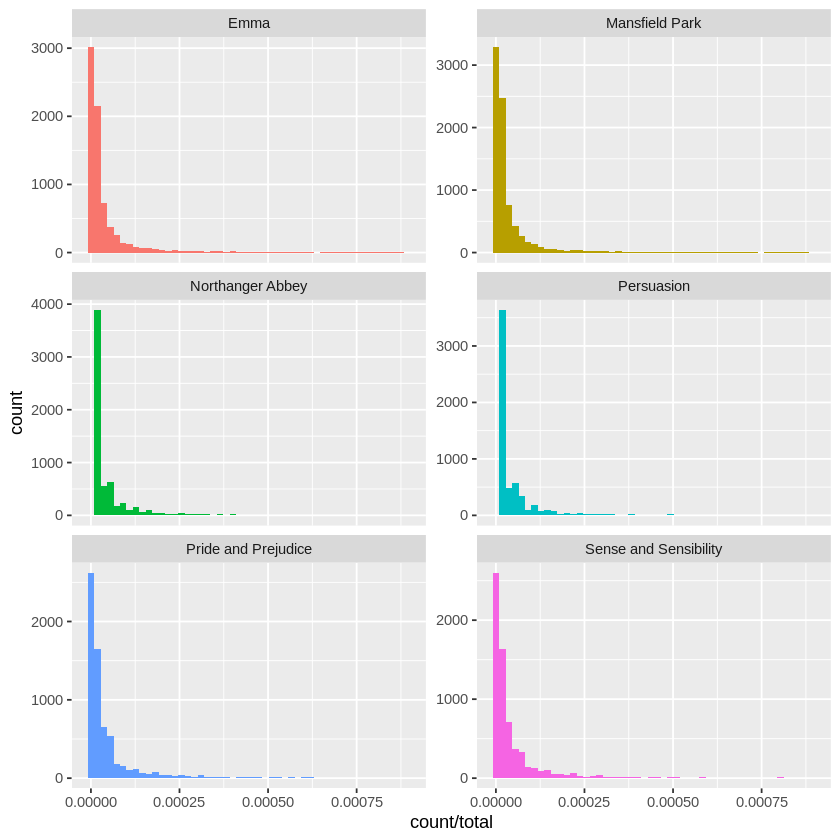

In [ ]:
library(ggplot2)
ggplot(book_words, aes(count/total, fill = title)) +
  geom_histogram(bins = 50, show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~title, ncol = 2, scales = "free_y")


Those graphs are hard to read because of their long tails. In these texts, as with most, the most common words are *much, much* more common than the others. There's a mathematical way to describe this: **Zipf's Law**: named for George Zipf, a twentieth-century American linguist. It says that words decrease logarithmically in frequency: in any given corpus, we would expect the most common word to be twice as common as the second most common word, three times as common as the third most common word, and so forth. That law results in a slope very like the one you see for word frequencies in Austen's novels.

We perhaps don't want to look at all the words in Austen, but instead words that are important (read: relatively common) but not so common as to be semantically meaningless. Fortunately there's a fuction in `tidytext` that allows us to filter out "stop words":

In [ ]:
book_words <- book_words %>%
  anti_join(stop_words)

View(book_words)

Looking at the `book_words` variable now, what do you think "stop words" are? If we arrange our words table to put the words with higher values at the top, we'll see those words that are, perhaps, characteristic of Austen's novels. What do you notice about them?


In [ ]:
book_words %>%
  arrange(desc(count)) %>%
  View()

We could also create a new column that calculates the ratio of word frequency to the overall words in the book:

In [ ]:
book_words <- book_words %>%
  ungroup() %>%
  mutate(ratio = count / total)

head(book_words)

title,word,count,total,ratio
<chr>,<chr>,<int>,<int>,<dbl>
Mansfield Park,fanny,816,163748,0.004983267
Emma,emma,790,164277,0.004808951
Sense and Sensibility,elinor,622,123264,0.005046080
Emma,miss,599,164277,0.003646280
Pride and Prejudice,elizabeth,596,125535,0.004747680
Mansfield Park,crawford,493,163748,0.003010724


We can plot these as well. The code below plots the top 20 words across the corpus by count. Can you edit a single line to plot the top words by count/book length ratio?


Selecting by ratio


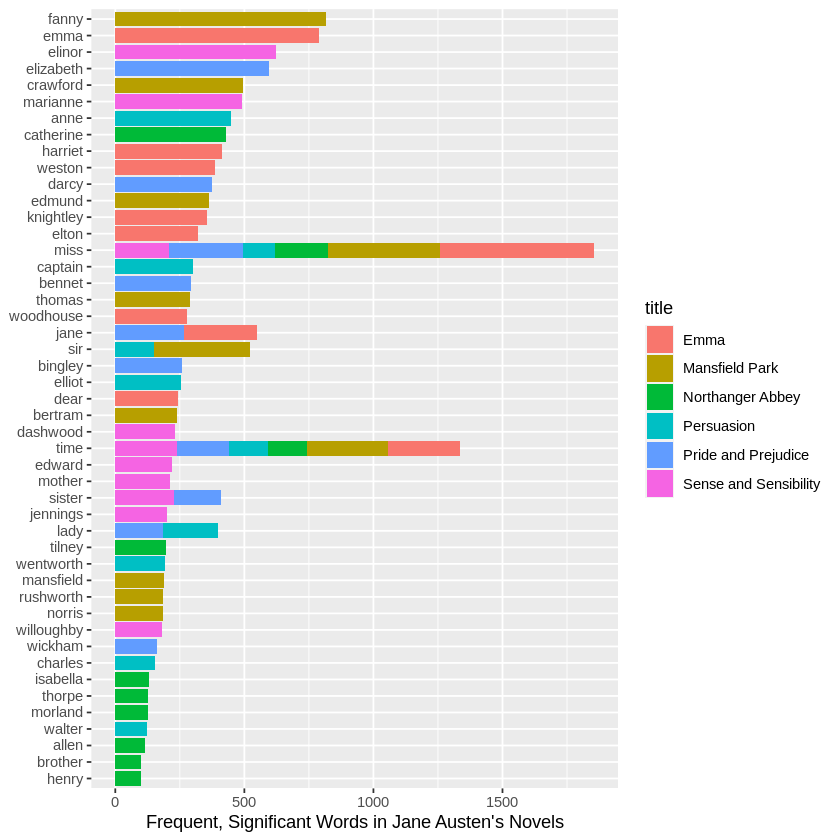

In [ ]:
ggplot(book_words %>% 
         arrange(desc(count)) %>%
         group_by(title) %>%
         top_n(10), 
  aes(x = reorder(word, count), y = count, fill = title)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = "Frequent, Significant Words in Jane Austen's Novels") +
  coord_flip()


Or grouped by book:

Selecting by ratio


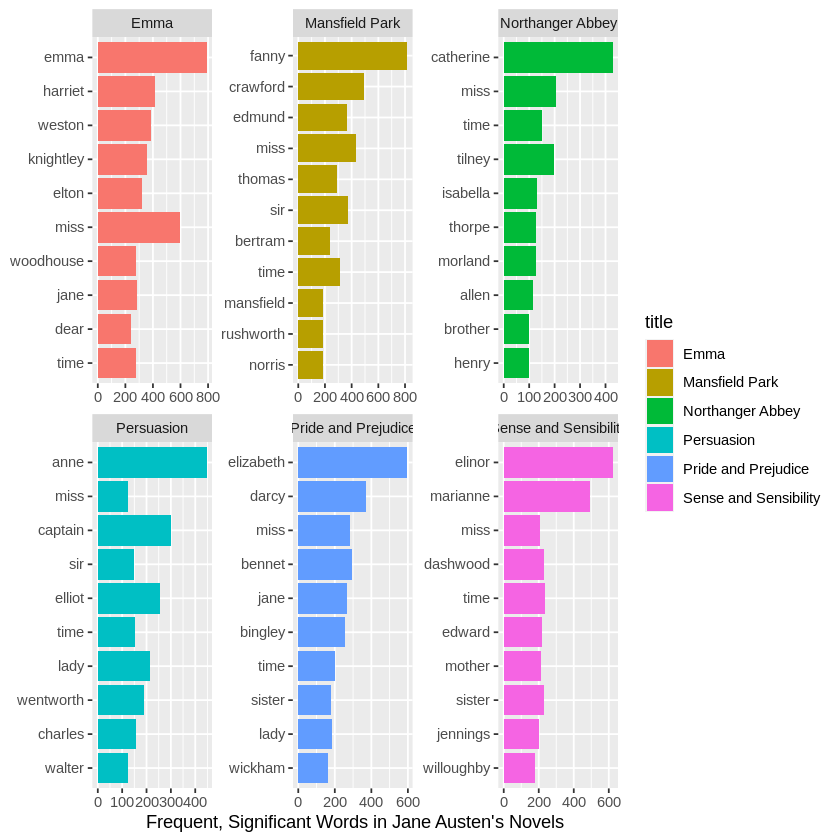

In [ ]:
ggplot(book_words %>% 
         arrange(desc(count)) %>%
         group_by(title) %>%
         top_n(10), 
  aes(x = reorder(word, count), y = count, fill = title)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = "Frequent, Significant Words in Jane Austen's Novels") +
  facet_wrap(~title, ncol = 3, scales = "free") +
  coord_flip()

Could you copy, paste, and modify the code above using the code block below to show you the words with the highest ratio (frequency of word vs. length of text) rather than highest raw count? By book?

## Filtering Names

No doubt you've noticed that many of these words are names. This *might* be interesting, depending on precisely what we hope to learn about Austen's language, but in many cases we would not want proper names in such an analysis, particularly if we wanted to focus on an author's language use more generally. How might we remove names from our data so we could focus on other significant words?

Let's see what these same charts look like if we filter out the 300 most common name words in Austen.

In [ ]:
book_words_nameless <- book_words %>%
  anti_join(read_csv("https://www.dropbox.com/s/ja6c2kk0nmokaj2/austen_names_300.csv?raw=1"))

Rows: 299 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): word

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = "word"


Selecting by ratio


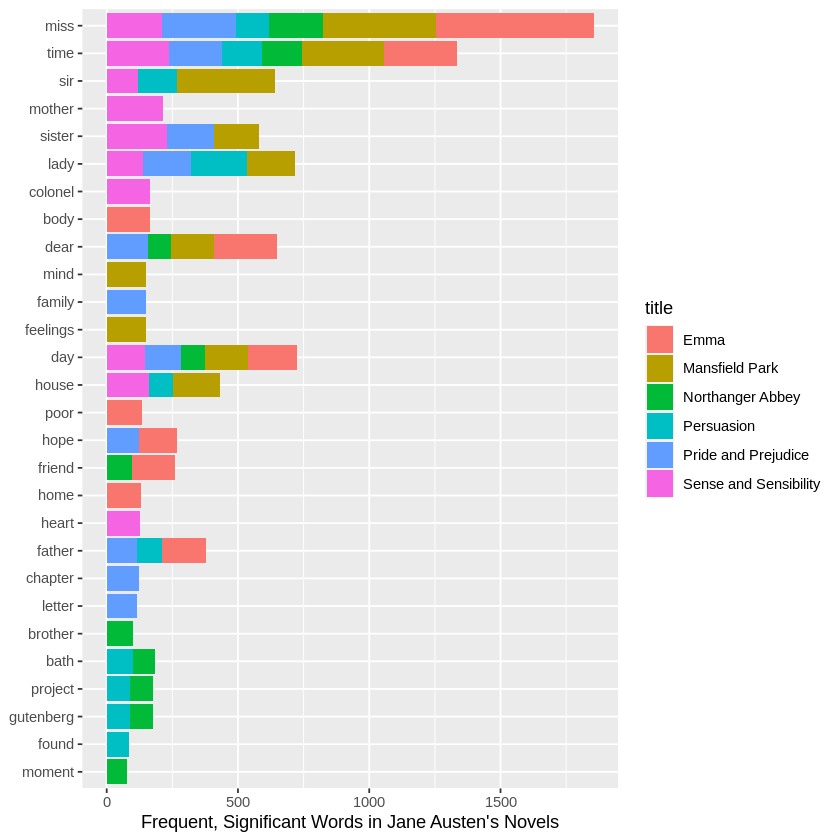

In [ ]:
ggplot(book_words_nameless %>% 
         arrange(desc(count)) %>%
         group_by(title) %>%
         top_n(10), 
  aes(x = reorder(word, count), y = count, fill = title)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = "Frequent, Significant Words in Jane Austen's Novels") +
  coord_flip()

Selecting by ratio


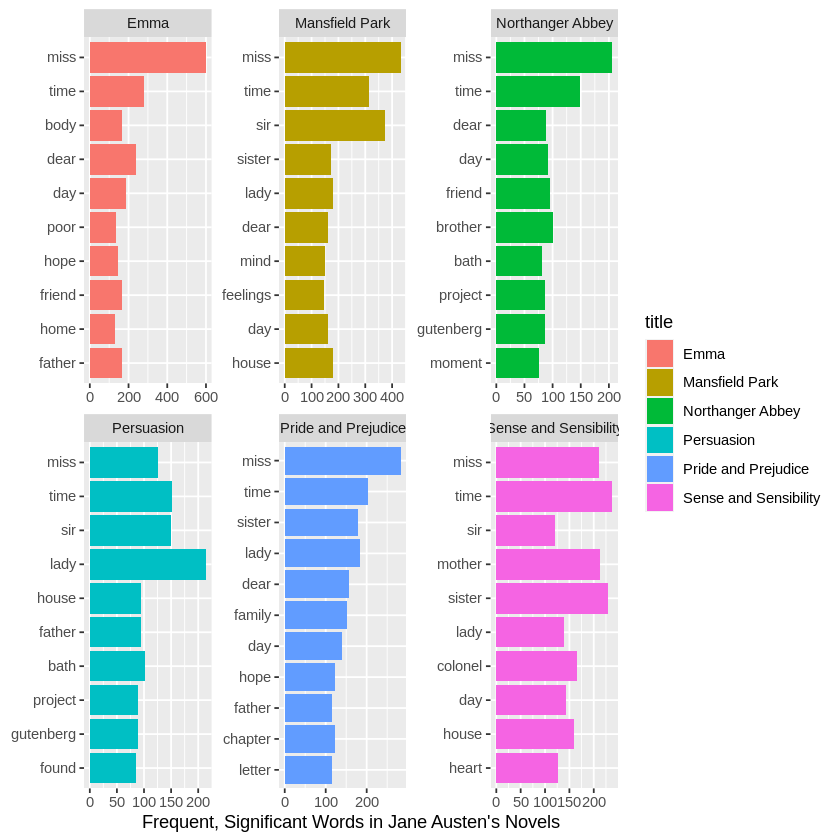

In [ ]:
ggplot(book_words_nameless %>% 
         arrange(desc(count)) %>%
         group_by(title) %>%
         top_n(10),
  aes(x = reorder(word, count), y = count, fill = title)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = "Frequent, Significant Words in Jane Austen's Novels") +
  facet_wrap(~title, ncol = 3, scales = "free") +
  coord_flip()

Thus far we haven't even moved past simple word counts: the most basic kind of computational text analysis we can do in R. I hope this little peek begins to hint at how R might give allow us to look at writing in new ways.

## Ngrams

Words are one way to think about texts, but our concordance above suggests another: what are called in computer science Ngrams, or sequences of `n` words in length. You may have experimented with [the Google Books Ngrams Viewer](https://books.google.com/ngrams), which allows you to plot the proportional frequency of phrases over time from the Google Books corpus. 

Once we begin working with books as textual data, we can choose our units of analysis on the fly. Above we used `unnest_tokens` to separate Jane Austen's novels into words, but here we separate into "4 grams," or sequences of 4 words. This allows us to plot the frequency of particular phrases across Austen's novels. Try out the code below to see what I mean (note: this code may take a few minutes to run). 

In [ ]:
book_ngrams <- austen %>% 
  unnest_tokens(ngram,text,token = "ngrams", n = 4) %>%
  group_by(title, ngram) %>% 
  summarize(count = n()) %>%
  arrange(desc(count))

head(book_ngrams)

`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.


title,ngram,count
<chr>,<chr>,<int>
Emma,i do not know,50
Mansfield Park,i do not know,30
Emma,a great deal of,26
Sense and Sensibility,the rest of the,22
Sense and Sensibility,i am sure i,21
Emma,i am sure i,20


By "spreading" this data into two columns, we can more easily see which ngrams appear in each book.


In [ ]:
book_ngrams <- book_ngrams %>%
  spread(title,count,fill=0)

View(book_ngrams)

ngram,Emma,Mansfield Park,Northanger Abbey,Persuasion,Pride and Prejudice,Sense and Sensibility
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
_à la mortal_ finely,0,1,0,0,0,0
_a_ _source_ _of_ _repentance_,1,0,0,0,0,0
_accepted_ him i could,1,0,0,0,0,0
_adair_ at this moment,1,0,0,0,0,0
_addition_ to the society,1,0,0,0,0,0
_advantages_ of the match,0,0,0,0,1,0
_affect_ concern in missing,0,0,0,0,1,0
_against_ their being serious,0,1,0,0,0,0
_agreeable_ day and find,0,1,0,0,0,0


Feel free to change the ngram value above and rerun the code between line 288 and here. How does changing the token unit change what you can learn?

Now run the code below: what does it do? Can you begin to piece together how?

In [ ]:
book_ngrams %>%
  mutate(sum = rowSums(.[2:7])) %>%
  arrange(desc(sum)) %>%
  View()

ngram,Emma,Mansfield Park,Northanger Abbey,Persuasion,Pride and Prejudice,Sense and Sensibility,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
i do not know,50,30,12,7,19,15,133
project gutenberg tm electronic,18,18,18,18,18,18,108
i am sure i,20,16,13,4,14,21,88
the rest of the,13,15,9,8,15,22,82
a great deal of,26,16,9,11,9,9,80
gutenberg literary archive foundation,13,13,13,13,13,13,78
project gutenberg literary archive,13,13,13,13,13,13,78
the project gutenberg literary,13,13,13,13,13,13,78
the project gutenberg tm,13,13,13,13,13,13,78


## Ngram Applications

Ngrams are a bit more complex than simple word counts, but not *that much more* complex. In next week's lab we'll delve into some more advanced territory. In closing today, however, I wanted to show how even such basic patterns contribute to more advanced analyses. 

In [ ]:
newspaperPages <- tibble(
  text = c(text=read_file("http://chroniclingamerica.loc.gov/lccn/sn85055199/1849-11-28/ed-1/seq-1/ocr.txt"),text=read_file("http://chroniclingamerica.loc.gov/lccn/sn98060050/1845-02-28/ed-1/seq-1/ocr.txt")),
  title = c("LewisburgChronicle","VermontPhoenix"))

Let's look at all the five-grams on both the historical pages we've loaded. After running the code below, you should see a dataframe with two columns: the first with the newspaper names and the second with the five-grams for each listed. The five-grams are grouped and counted, so you can see how many times each is used in each paper. We only have two pages in our dataset, so *most* of them will only appear once, but there is some duplication even across so little text.

In [ ]:
newspaperPages %>% 
  unnest_tokens(word,text,token = "ngrams", n = 5) %>% 
  group_by(title, word) %>% 
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  View()

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.


title,word,count
<chr>,<chr>,<int>
LewisburgChronicle,maiden whom the angels name,3
VermontPhoenix,maiden whom the angels name,3
LewisburgChronicle,and forth across the room,2
LewisburgChronicle,and radiant maiden whom the,2
LewisburgChronicle,back and forth across the,2
LewisburgChronicle,beguiling my sad fancy into,2
LewisburgChronicle,by the side of it,2
LewisburgChronicle,entrance at my chamber door,2
LewisburgChronicle,entreating entrance at my chamber,2


We could also visualize this, plotting the five grams based on their occurence on one or both pages. The graph below shows which Ngrams appear on both newspaper pages. Is there anything familiar about these phrases? By "spreading" the data into two columns, we can more easily see which ngrams appear on both pages.

In [ ]:
newspaperPages %>%
  unnest_tokens(word,text,token = "ngrams", n=5) %>%
  group_by(title,word) %>% 
  summarize(count=n()) %>% 
  spread(title,count,fill=0) %>%
  # filter(LewisburgChronicle >= 1 & VermontPhoenix >= 1) %>%
  View()

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.


word,LewisburgChronicle,VermontPhoenix
<chr>,<dbl>,<dbl>
0 b jt the raven,1,0
0 n woeden the raven,1,0
0 per hundred but the,0,1
0 ronicl apjd an by,1,0
00 w v nd d,1,0
"000 85,000 if it rises",0,1
1 1 i us eincacy,0,1
1 alood i repealing tis,0,1
1 am a living instance,0,1


Now let's just look at the five grams that appear on both pages. To do that, you just need to "uncomment" line 271 by deleting the hashtag at the front of the line. Then rerun the code.

Thus far we've mostly been using commands to look at the data in various ways, but we haven't been saving those views. If we wanted to, however, we could put some of our results—such as a dataframe of matching five grams between pages—into a new variable, which we could them perform new operations on. Like so:

In [ ]:
sharedFiveGrams <- newspaperPages %>%
  unnest_tokens(word,text,token = "ngrams", n=5) %>%
  group_by(title,word) %>% 
  summarize(count=n()) %>% 
  spread(title,count,fill=0) %>%
  filter(LewisburgChronicle >= 1 & VermontPhoenix >= 1) %>%
  rename(fivegram = word)
sharedFiveGrams$sharedSum = sharedFiveGrams$LewisburgChronicle + sharedFiveGrams$VermontPhoenix
sharedFiveGrams <- arrange(sharedFiveGrams, desc(sharedSum))

head(sharedFiveGrams)

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.


fivegram,LewisburgChronicle,VermontPhoenix,sharedSum
<chr>,<dbl>,<dbl>,<dbl>
maiden whom the angels name,3,3,6
and radiant maiden whom the,2,2,4
radiant maiden whom the angels,2,2,4
rare and radiant maiden whom,2,2,4
visiter entreating entrance at my,2,2,4
whom the angels name lenore,2,2,4


Let's make a bar chart, just because.

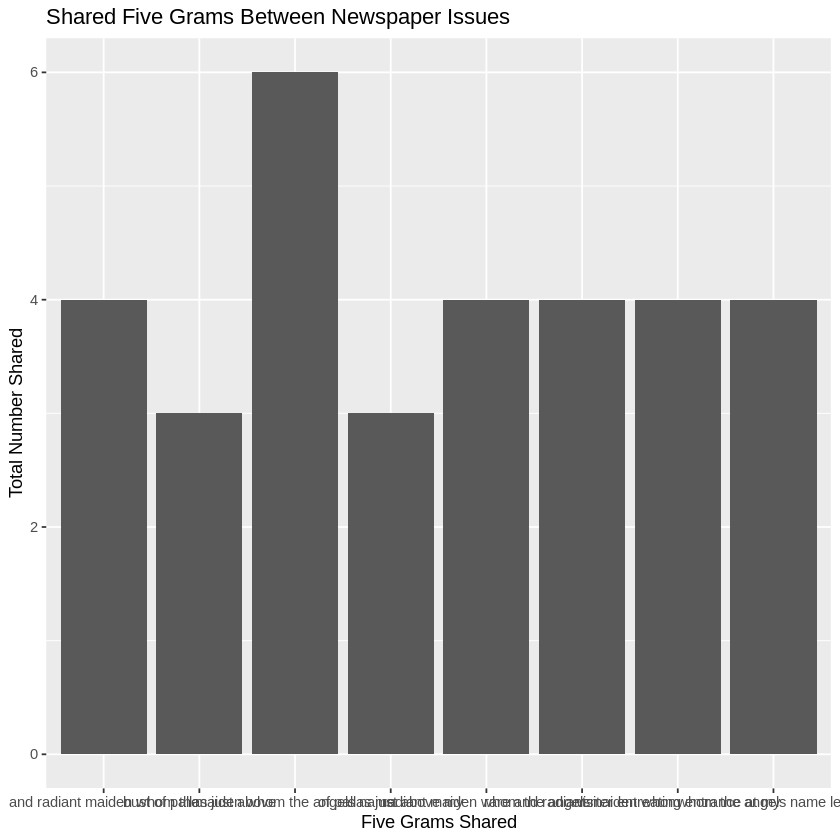

In [ ]:
sharedFiveGrams %>%
  filter(sharedSum > 2) %>%
  ggplot() +
  geom_bar(stat="identity") +
  aes(x=fivegram,y=sharedSum) +
  labs(title = "Shared Five Grams Between Newspaper Issues", y = "Total Number Shared", x = "Five Grams Shared")

As you might have guessed by now, these newspapers share Ngrams because they both reprinted Edgar Allan Poe's poem "The Raven." You could look at the page images for both newspapers at <https://chroniclingamerica.loc.gov/lccn/sn85055199/1849-11-28/ed-1/seq-1/> and <https://chroniclingamerica.loc.gov/lccn/sn98060050/1845-02-28/ed-1/seq-1/>. In the [Viral Texts Project](http://viraltexts.org) we're working at a larger scale and use slightly more complicated methods (since we don't know in advance where to look for reprints), but Ngrams are important to our methods for finding reprinted content in nineteenth-century newspapers. Essentially, our algorithm is looking for pages across large-scale historical newspaper archives that share many Ngrams in relatively close proximity to each other. Looking for these kinds of textual patterns—overlapping, matching strings of text—allows us to operationalize a humanistic research question, which asks what kinds of texts circulated among newspapers during the nineteenth century.
